<a href="https://colab.research.google.com/github/SaravanavelE/TechnoHacks/blob/main/HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORT THE NECCESSORY LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

***IMPORT THE DATASET***

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/techh/emp det/HR-Employee-Attrition.csv")
d.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


***SPLIT THE DATASET INTO X & Y***

In [ ]:
x=pd.DataFrame(d,columns=['Age','DailyRate','DistanceFromHome','Education'])
y=pd.DataFrame(d,columns=['Attrition'])
print(x.head())
print(y.head())

   Age  DailyRate  DistanceFromHome  Education
0   41       1102                 1          2
1   49        279                 8          1
2   37       1373                 2          2
3   33       1392                 3          4
4   27        591                 2          1
  Attrition
0       Yes
1        No
2       Yes
3        No
4        No


***LABEL ENCODER***

In [ ]:
le = LabelEncoder()
y['Attrition'] = le.fit_transform(y['Attrition'])
print(y.head())


   Attrition
0          1
1          0
2          1
3          0
4          0


***SPLIT THE DATASET INTO TRAINING AND TESTING DATASET***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1176, 4), (294, 4), (1176, 1), (294, 1))

***LINEAR REGRESSION MODEL***

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

***MODEL PREDICTION***

In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(294, 1)


***CO-EFFICIENT***

In [ ]:
ce=model.coef_
print("Coefficients:",ce)

Coefficients: [[-5.74915655e-03 -4.48876785e-05  3.73649154e-03  8.12432111e-03]]


***INTERCEPT***

In [ ]:
ic=model.intercept_
print("Intercept:",ic)

Intercept: [0.3490545]


***MEAN SQUARED ERROR***

In [ ]:
mse= mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.13672148194478304


***R- SQUARED ERROR***

In [ ]:
r2= r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.04642475483101227


***PLOT THE GRAPH BETWEEN PREDICTED VALUE AND ACTUAL VALUE***

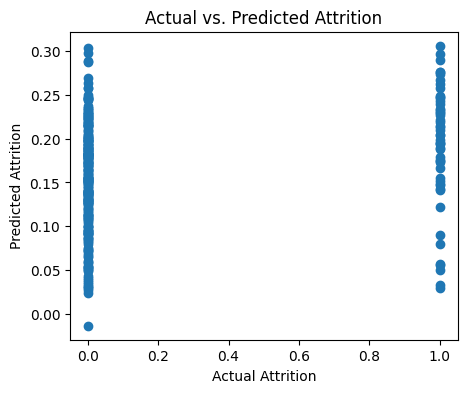

In [57]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Attrition")
plt.ylabel("Predicted Attrition")
plt.title("Actual vs. Predicted Attrition")
plt.show()

***PLOT HISTOGRAMS FOR EACH FEATURE***

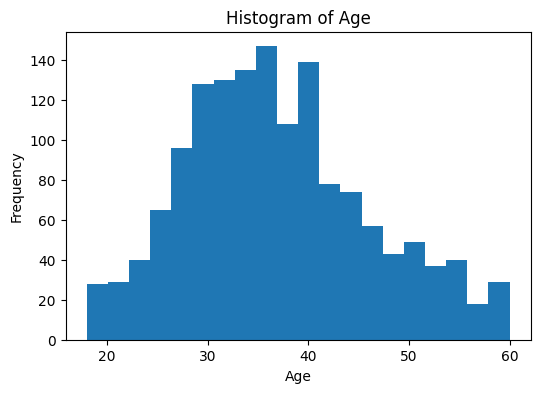

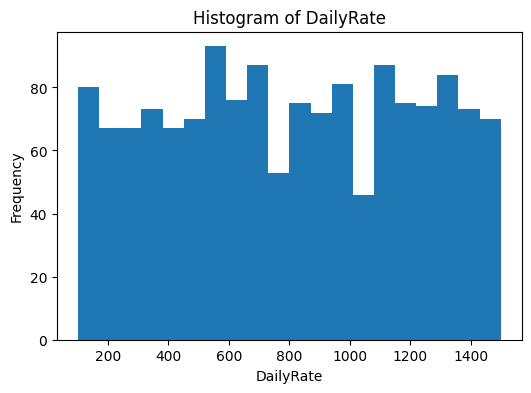

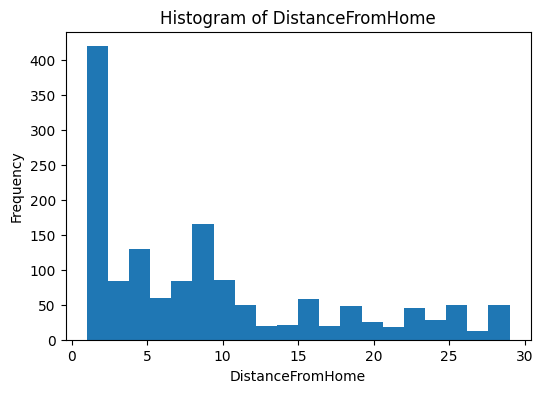

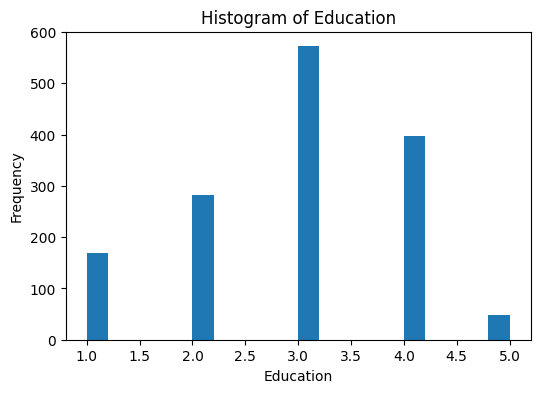

In [ ]:
for column in x.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(x[column], bins=20)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

***CORRELATION MATRIX***

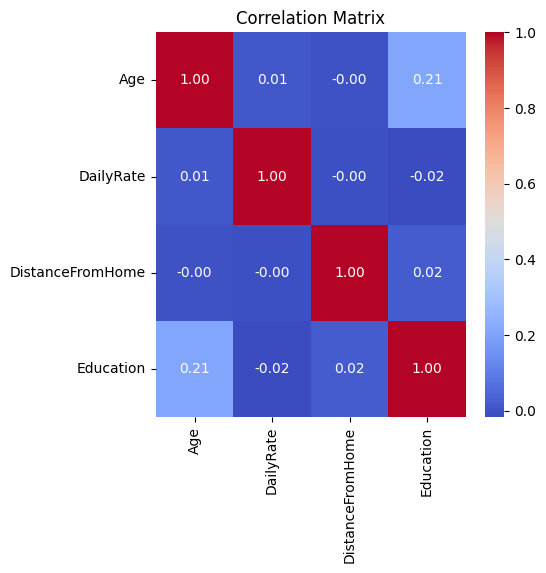

In [ ]:

plt.figure(figsize=(5, 5))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

***HEAT MAP***

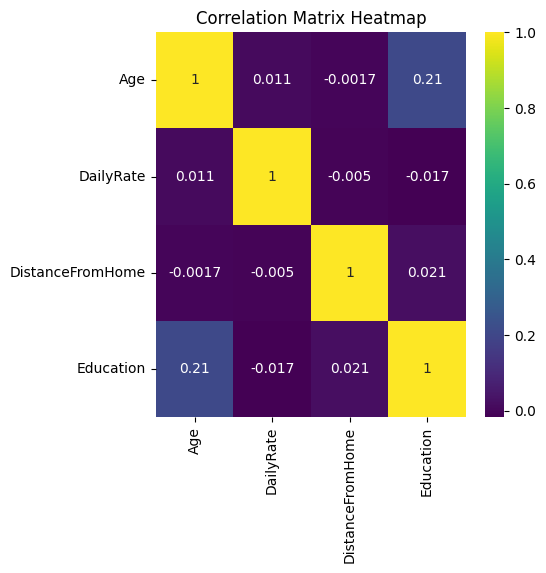

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(x.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()